In [2]:
import simpy
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta
from datetime import datetime

passengers_data = pd.read_csv('passengers_4.csv')
passengers_data['ArrivalTime'] = pd.to_datetime(passengers_data['ArrivalTime'], unit='s')

time_interval_minutes = 15

arrival_counts = passengers_data['ArrivalTime'].dt.floor(f'{time_interval_minutes}T').value_counts()
arrival_counts = arrival_counts.sort_index()
arrival_counts

time_interval_minutes = 15
time_range = pd.date_range(start='1970-01-01 00:00:00', end='1970-01-01 12:00:00', freq=f'{time_interval_minutes}T')

arrival_df = pd.DataFrame({'ArrivalCount': [0] * len(time_range)}, index=time_range)
arrival_df['TimePeriod'] = arrival_df.index
arrival_df.loc[arrival_counts.index, 'ArrivalCount'] = arrival_counts.values
arrival_df.reset_index(drop=True, inplace=True)
arrival_df = arrival_df[["TimePeriod", "ArrivalCount"]]

security_data = pd.read_csv('security.csv')
security_data['Time'] = pd.to_datetime(security_data['Time'], unit='s')

# Merge security_data and arrival_df based on the 'Time' column
merged_data = pd.merge(security_data, arrival_df, left_on='Time', right_on='TimePeriod', how='left')
# Drop unnecessary columns, if needed
merged_data.drop(columns=['TimePeriod'], inplace=True)

# Filter data for the desired time range (before 12:00)
filtered_data = merged_data[merged_data['Time'] <= '1970-01-01 12:00:00']
filtered_data["SecurityCapacity"] = filtered_data["Lanes"]*45
filtered_data["ExcessPassengers"] = filtered_data.apply(lambda row: max(row["ArrivalCount"] - row["SecurityCapacity"], 0), axis=1)
filtered_data["IdleCapacity"] = filtered_data.apply(lambda row: max(row["SecurityCapacity"] - row["ArrivalCount"], 0), axis=1)
filtered_data = filtered_data[["Time","ArrivalCount","Lanes","SecurityCapacity","ExcessPassengers","IdleCapacity"]] 

filtered_data

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\14399\AppData\Local\Temp/ipykernel_11384/1274697727.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["SecurityCapacity"] = filtered_data["Lanes"]*45
C:\Users\14399\AppData\Local\Temp/ipykernel_11384/1274697727.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

,Time,ArrivalCount,Lanes,SecurityCapacity,ExcessPassengers,IdleCapacity
0,1970-01-01 00:00:00,0.0,1,45,0.0,45.0
1,1970-01-01 00:15:00,0.0,1,45,0.0,45.0
2,1970-01-01 00:30:00,0.0,1,45,0.0,45.0
3,1970-01-01 00:45:00,0.0,1,45,0.0,45.0
4,1970-01-01 01:00:00,0.0,1,45,0.0,45.0
5,1970-01-01 01:15:00,0.0,1,45,0.0,45.0
6,1970-01-01 01:30:00,0.0,1,45,0.0,45.0
7,1970-01-01 01:45:00,1.0,1,45,0.0,44.0
8,1970-01-01 02:00:00,1.0,1,45,0.0,44.0
9,1970-01-01 02:15:00,1.0,1,45,0.0,44.0


Peak periods:
1970-01-01 04:00:00     44
1970-01-01 04:15:00     82
1970-01-01 04:30:00    113
1970-01-01 04:45:00     90
1970-01-01 05:00:00     74
1970-01-01 05:15:00     65
1970-01-01 05:30:00     39
1970-01-01 07:30:00     65
1970-01-01 07:45:00    106
1970-01-01 08:00:00    105
1970-01-01 08:15:00    123
1970-01-01 08:30:00    133
1970-01-01 08:45:00     97
1970-01-01 09:00:00     94
1970-01-01 09:15:00     52
1970-01-01 09:30:00     42
Name: ArrivalTime, dtype: int64


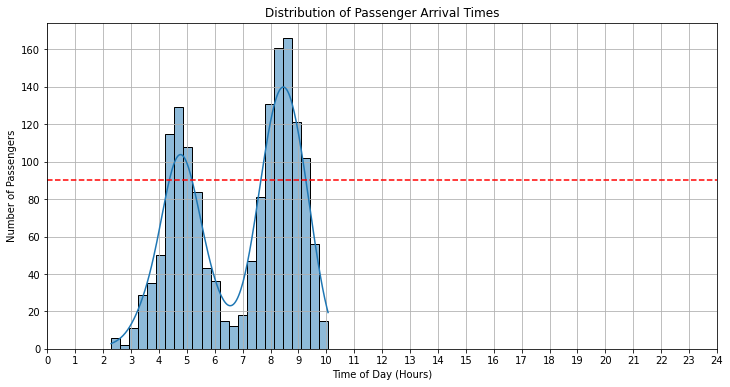

In [2]:
passengers_data = pd.read_csv('passengers_0.csv')
passengers_data["ArrivalTime_hour"] = passengers_data["ArrivalTime"]/3600

# Plotting the distribution of arrival times
plt.figure(figsize=(12, 6))
sns.histplot(passengers_data['ArrivalTime_hour'], bins=24, kde=True)
plt.title('Distribution of Passenger Arrival Times')
plt.xlabel('Time of Day (Hours)')
plt.ylabel('Number of Passengers')
plt.xticks(range(0, 25))
plt.grid(True)
plt.axhline(y=90, color='red', linestyle='--', label='Capacity')

peak_periods = arrival_counts[arrival_counts > arrival_counts.median()]
print("Peak periods:")
print(peak_periods)

# Vitual Queue

In [75]:
# {"flight": ["starting times"], ...}, {'flight', ["capacity"]}, zip(), duration = 15
virtual_queue = [
    {"flights": "BM2616", "time_slots": [4*3600], "capacity":[30]}, #Depature 05:45
    {"flights": "XC6333", "time_slots": [5.25*3600, 5.5*3600, 5.75*3600],"capacity":[20,20,5]}, #Depature 06:00
    {"flights": "OO2037", "time_slots": [5.5*3600, 5.75*3600, 6*3600], "capacity":[20,20,5]}, #Depature 06:15
    {"flights": "HP4524", "time_slots": [5.5*3600, 5.75*3600, 6*3600, 6.25*3600],"capacity":[10,20,5,10]}, #Depature 06:30
    {"flights": "DN7022", "time_slots": [6.5*3600, 6.25*3600, 6*3600],"capacity":[30,20,10]}, #Depature 06:45

    {"flights": "QX7315", "time_slots": [7*3600], "capacity":[20]}, #Depature 09:30
    {"flights": "SS2446", "time_slots": [9.25*3600, 9.5*3600], "capacity":[20, 20]}, #Depature 09:45
    {"flights": "ZI1701", "time_slots": [9.75*3600, 9.5*3600], "capacity":[20, 20]}, #Depature 10:00
    {"flights": "HC1255", "time_slots": [10*3600, 9.75*3600, 9.5*3600], "capacity":[20,20, 20]}, #Depature 10:15
    {"flights": "HF1818", "time_slots": [10.25*3600, 10*3600, ], "capacity":[20, 20]}, #Depature 10:30
    {"flights": "IG2596", "time_slots": [10.5*3600], "capacity":[40]} #Depature 10:45
]


#Peak period 1: 04:15 - 05:15
peak_periods1_start = 4.25*60*60
peak_periods1_end = 5.25*60*60

#Peak period 2: 07:30 - 09:00
peak_periods2_start = 7.5*60*60
peak_periods2_end = 9*60*60

total_capacity = 0
for flight_info in virtual_queue:
    total_capacity += sum(flight_info["capacity"])

print("总容量为:", total_capacity)

总容量为: 465


In [76]:
import numpy as np
import random
from datetime import datetime, timedelta

passengers_data = pd.read_csv('passengers_0.csv').sort_values(by='ArrivalTime')
security_data = pd.read_csv('security.csv')
flights_data = pd.read_csv('flights.csv')
passengers_data = pd.merge(passengers_data, flights_data, left_on='FlightNumber', right_on='FlightNumber', how='left')
passengers_data["new_ArrivalTime"] = passengers_data["ArrivalTime"]
passengers_data['Priority'] = 0

# 遍历虚拟队列列表
for flight_info in virtual_queue:
    flight_code = flight_info["flights"]
    time_slots = flight_info["time_slots"]
    capacities = flight_info["capacity"]

    # 获取符合条件的乘客
    eligible_passengers = passengers_data[((passengers_data['ArrivalTime'].between(peak_periods1_start, peak_periods1_end)) | 
                                       (passengers_data['ArrivalTime'].between(peak_periods2_start, peak_periods2_end))) & 
                                       (passengers_data['FlightNumber'] == flight_code)]

    # 随机选择乘客并分配到时间槽
    for i, passenger in eligible_passengers.iterrows():
        #如果所有时间槽都用完，可以在这里跳出循环
        if not time_slots:
            break
            
        time_slot = random.choice(time_slots)
        capacity = capacities[time_slots.index(time_slot)]
        
        # 检查时间槽容量是否用完
        if capacity == 0:
            continue
        
        # 生成随机到达时间，介于time_slot和time_slot + 15分钟之间
        random_arrival_time = random.uniform(time_slot, time_slot + 0.25 * 3600)
        
        # 进行相应的处理，例如更新到达时间、设置优先级等
        passengers_data.loc[i, 'new_ArrivalTime'] = random_arrival_time
        passengers_data.loc[i, 'Priority'] = 1  # 设置优先级

        # 减少相应时间槽的容量
        capacities[time_slots.index(time_slot)] -= 1

        # 如果时间槽容量用完，可以在这里移除该时间槽
        if capacities[time_slots.index(time_slot)] == 0:
            time_slots.remove(time_slot)


passengers_data["new_ArrivalTime_formatted"] = passengers_data["new_ArrivalTime"].apply(lambda x: (datetime(1970, 1, 1) + timedelta(seconds=x)).strftime('%H:%M'))
passengers_data["DepartureTime_formatted"] = passengers_data["DepartureTime"].apply(lambda x: (datetime(1970, 1, 1) + timedelta(seconds=x)).strftime('%H:%M'))


In [77]:
eligible_passengers
passengers_data[passengers_data["Priority"]==1]

,Id,ArrivalTime,FlightNumber,DepartureTime,Passengers,new_ArrivalTime,Priority,new_ArrivalTime_formatted,DepartureTime_formatted
139,FUDVUWVTT0CV1I7DIVTH,15304.524860,OO2037,22500,180,20495.244038,1,05:41,06:15
140,BRHZMXK73XTF4A6KKD7T,15308.084282,XC6333,21600,130,20352.780976,1,05:39,06:00
141,MP6NF9BFZIBJ7KC94IQQ,15315.905182,BM2616,20700,80,15101.219190,1,04:11,05:45
142,DRV9I4D1ATNTUFBJWCN1,15318.430889,BM2616,20700,80,15018.206997,1,04:10,05:45
143,BKNUYD2FK4QOPBSPKO07,15335.937263,BM2616,20700,80,14425.170181,1,04:00,05:45
...,...,...,...,...,...,...,...,...,...
1332,FUJC0TVTAONKR5FU6XMA,32060.656516,HF1818,37800,87,36881.124183,1,10:14,10:30
1349,F4IDGDHK7I4BTG3OQ4VH,32236.747919,HF1818,37800,87,37368.303525,1,10:22,10:30
1351,9A1BUOPREWFS3O6BUK32,32249.326999,HF1818,37800,87,37113.610862,1,10:18,10:30
1364,PONTAR94WFO7Z0CORAIJ,32334.150214,HF1818,37800,87,37101.863995,1,10:18,10:30


In [12]:
import random

passengers_data['priority'] = 0  # 初始化 priority 列

def assign_priority(row, time_slots, capacities):
    for i in range(len(time_slots)):
        start_time = time_slots[i]
        end_time = start_time + 15 * 60  # 15分钟一个时间槽
        if row['ArrivalTime'] >= start_time and row['ArrivalTime'] < end_time:
            # 在高峰期内
            if capacities[i] > 0:
                # 如果时间槽容量允许
                row['ArrivalTime'] = random.uniform(start_time, end_time)
                row['priority'] = 1
                capacities[i] -= 1
            break
    return row

# 遍历字典
for flight, slots_and_capacity in dict_BM2616.items():
    time_slots = slots_and_capacity[0]  # 改为使用索引
    capacities = slots_and_capacity[1]  # 改为使用索引

    # 遍历乘客数据
    passengers_data = passengers_data.apply(
        lambda row: assign_priority(row, time_slots, capacities),
        axis=1
    )

# 你的数据框现在包含更新的 'ArrivalTime' 和 'priority' 列
print(passengers_data)


IndexError: list index out of range